In [73]:
import numpy as np
import pandas as pd
from IPython.display import Image, display_png

論理演算のANDは以下のようになります。

In [74]:
signal = pd.DataFrame(
    [
        [0,0],
        [1,0],
        [0,1],
        [1,1]
    ],
    
    columns = ["x1", "x2"]
)

In [75]:
# AND
AND = signal.copy()
AND["y"] = signal.x1 & signal.x2
AND

,x1,x2,y
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1



以下の図のようなパーセプトロンで論理演算のANDを実装することを考えます。

x1，x2：入力層

y：出力層

w1，w2：入力層と出力層のユニット（ニューロン）の結合の強さを表す係数 (結合係数)

b：バイアス

θ：ステップ関数

ちなみにここでいうバイアスというのは偏りのことです

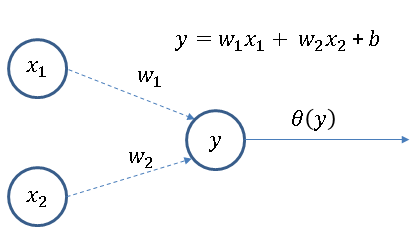

In [76]:
display_png(Image('Simple_Perceptron1.PNG'))

このネットワークは，2入力，1出力です。

いつも1が入力されてくるユニットを付け加えて3入力1出力のネットワークとみなすとプログラムしやすくなります。

その場合、以下のような図になります。

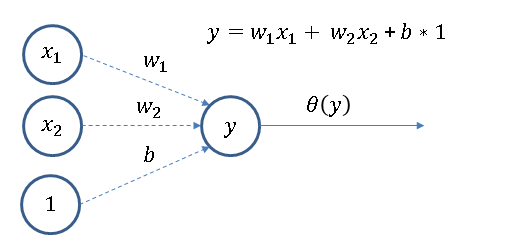

In [77]:
display_png(Image('Simple_Perceptron2.PNG'))

次に、ステップ関数を定義します。

ステップ関数とは、入力が0を超えたら1を出力し、それ以外は0を出力する関数です。

In [78]:
def step(x):
    if x > 0 :
        return 1
    else :
        return 0

In [79]:
def And(x1, x2):
    x = np.array([1, x1, x2])
    
    # 結合係数　w1 = 0.5 w2 = 0.5 バイアス b = -0.7
    b = -0.7
    
    w = np.array([b, 0.5, 0.5])
    
    # 以下は「tmp = np.sum(x * w)」と同一
    tmp = np.sum(np.dot(x, w))
    
    return step(tmp)

In [80]:
print(And(0,0))
print(And(1,0))
print(And(0,1))
print(And(1,1))

0
0
0
1


今はANDになるように、結合係数(w1,w2)やバイアス(b)は手動で与えましたが、学習によって決めます。

In [81]:
# 各点での学習を50回繰り返す
epoch = 50

# 学習の進み方を調節するパラメータ
eta = 0.1

# 係数の初期設定 (b, w1, w2)
w = np.array([0.0, 0.0, 0.0])

print(f"w = {type(w)}")

# 1つ前のステップでの係数を入れておくための変数
w_prev = w

# 学習の書くステップでの係数を追加していくためのnumpy配列
ws = w

# 学習データ
x_train = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]

# 教師ラベル
y_train = [0, 0, 0, 1]

for i in range(epoch):
    for x, y in zip(x_train, y_train):
        output = step(np.sum(w*x))
        
        # b, w1, w2の係数を決めます
        for j in range(len(w)):
            w[j] = w[j] + (y-output) * x[j] * eta
        
    # 各ステップでの係数を追加したnumpy配列を作る
    ws = np.append(ws, w)
    
    # print(w)
    # 1つ前のステップの係数を新しく求められた係数に置き換える
    w_prev = w

# 各ステップの係数を貯めたwvecsは1次元のnumpy配列にしていたので
# 各ステップ毎の多次元配列になるように整形する
ws = ws.reshape(-1,3)

w = <class 'numpy.ndarray'>


学習の経過も含めて表示する (b, w1, w2)

In [82]:
print(ws)

[[ 0.1  0.1  0.1]
 [ 0.1  0.1  0.1]
 [ 0.   0.2  0.1]
 [-0.1  0.2  0.1]
 [-0.1  0.2  0.2]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]
 [-0.2  0.2  0.1]]


上記の学習で求めたバイアス、結合係数をAndの演算結果を求める式に適用する

In [83]:
def And2(x1, x2):
    x = np.array([1, x1, x2])
    
    # バイアス b = -0.2
    # 結合係数 w1 = 0.2
    # 結合係数 w2 = 0.1
    b = -0.2
    w1 = 0.2
    w2 = 0.1
    
    w = np.array([b, w1, w2])
    
    # 以下は「tmp = np.sum(x * w)」と同一
    tmp = np.sum(np.dot(x, w))
    
    return step(tmp)

上記の関数の結果を確認する

In [84]:
print(And2(0,0))
print(And2(1,0))
print(And2(0,1))
print(And2(1,1))

0
0
0
1
